### 목차
- 인공 신경망으로 복잡한 함수 모델링
    - 단일층 신경망 요약
    - 다층 신경망 구조
    - 정방향 계산으로 신경망 활성화 출력 계산


- 손글씨 숫자 분류
    - MNIST 데이터셋 구하기    

## 인공 신경망으로 복잡한 함수 모델링

### 단일층 신경망 요약

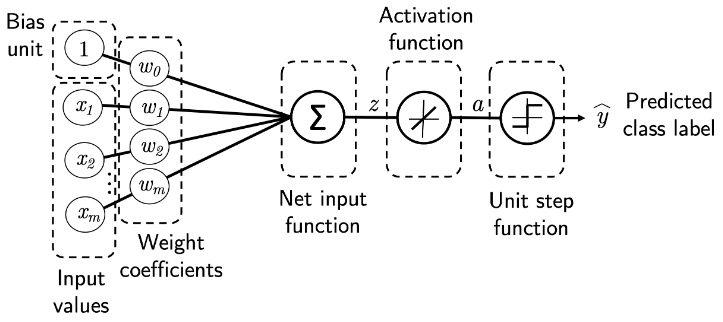

### 다층 신경망 구조

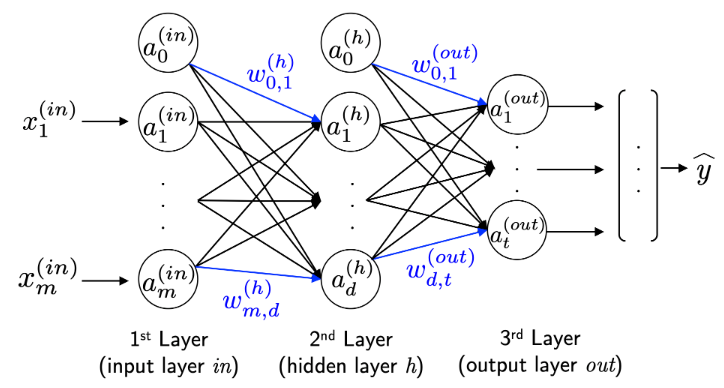

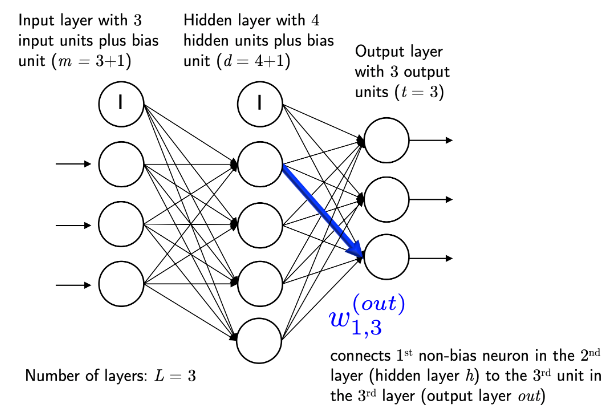

### 정방향 계산으로 신경망 활성화 출력 계산

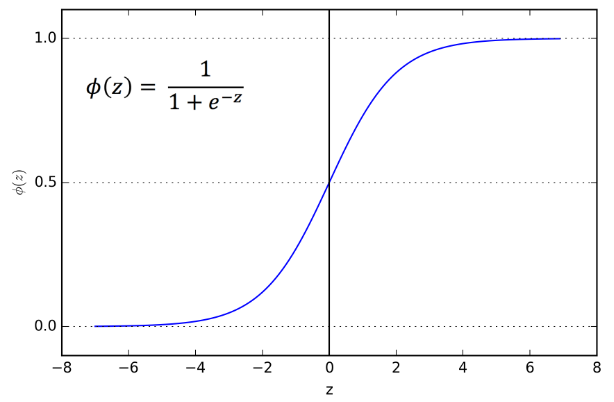

### 데이터 download 후, 아래에서 code로 압축 풀기.
- 사이킷런을 활용하여 데이터를 load할 경우.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


data, target = fetch_openml('mnist_784', version=1, return_X_y=True)
target = target.astype(int)

data = ((data / 255.) - .5) * 2

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=10000, random_state=123, stratify=target)

In [3]:
train_input.shape

(60000, 784)

In [4]:
train_target.shape

(60000,)

### 실제 손글씨 데이터 이미지 확인
- 784개 픽셀 벡터 => 원본 28 x 28

(60000, 28, 28)


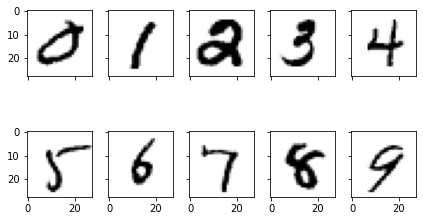

In [11]:
train_input = train_input.reshape(-1, 28, 28)
print(train_input.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = train_input[train_target == i][0]
    ax[i].imshow(img, cmap='Greys')

plt.tight_layout()
plt.show()

### 손글씨마다 얼마나 차이 => 숫자 샘플을 여러 개 출력

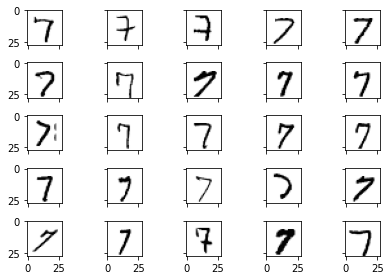

In [12]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = train_input[train_target == 7][i]
    ax[i].imshow(img, cmap='Greys')
    
plt.tight_layout()
plt.show()

## 스케일된 이미지를 파이썬 세션에서 빠르게 읽게 포멧 저장 
## => 넘파이 [savez] / [savez_compressed]

In [13]:
import numpy as np

np.savez_compressed('mnist_scaled.npz',
                   train_input = train_input,
                   train_target = train_target,
                   test_input = test_input,
                   test_target = test_target)

### npz파일 생성 후, 넘파이 load하여 전처리된 MNIST 이미지 배열 load

In [26]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['train_input', 'train_target', 'test_input', 'test_target']

### 리스트 내포 구문을 사용하여 4개의 데이터 배열을 변수에 할당.
- train_input = mnist['train_input'] 동일한 방법

In [28]:
train_input, train_target, test_input, test_target = [mnist[x] for x in mnist.files]

In [29]:
train_input.shape

(60000, 28, 28)